In [1]:
%matplotlib inline

import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
true_regression_line = true_intercept + true_slope * x
y = true_regression_line + np.random.normal(scale=.5, size=size)

# Add outliers
X = np.append(x, [.1, .15, .2])
Y = np.append(y, [8, 6, 9])

In [3]:
model = pm.Model()

with model:
    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)
    # nu = pm.Gamma('nu', alpha=2, beta=0.1)
    nu = pm.Uniform('nu', lower=0, upper=50)
    # Expected value of outcome
    mu = alpha + beta * X
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.StudentT('Yobs', nu=nu, mu=mu, sd=sigma, observed=Y)

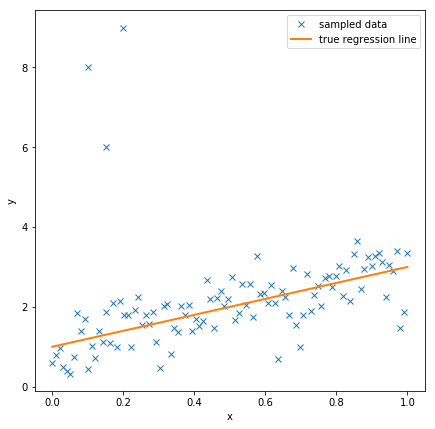

In [4]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y')
ax.plot(X, Y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [5]:
map_estimate = pm.find_MAP(model=model)
map_estimate

/home/bara947/.local/intelpython3/envs/u18fest/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -116.29, ||grad|| = 4.6462: 100%|██████████| 27/27 [00:00<00:00, 2377.37it/s]  


{'alpha': array(0.90421257),
 'beta': array(2.26424125),
 'sigma_log__': array(-0.90806177),
 'nu_interval__': array(-3.12385635),
 'sigma': array(0.40330516),
 'nu': array(2.106693)}

In [6]:
with model:
    # draw 500 posterior samples
    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, beta, alpha]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:09<00:00, 2400.77draws/s]
The acceptance probability does not match the target. It is 0.8818988920773159, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9475a43f98>,
      dtype=object)

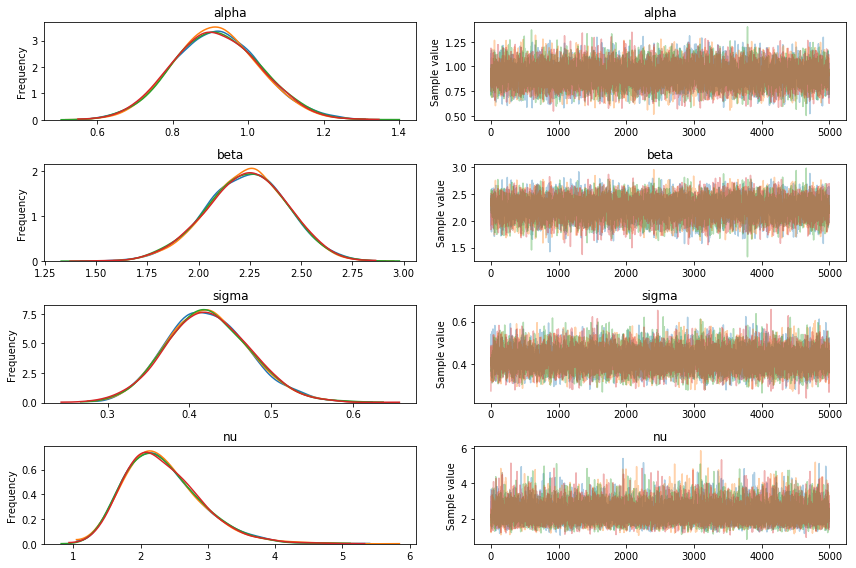

In [7]:
pm.traceplot(trace)